In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('myopia.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [37]:
columns_to_scale = df.columns.to_list()[0:12]

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_to_scale])

In [39]:
new_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
new_df['MOMMY'] = df['MOMMY']
new_df['DADMY'] = df['DADMY']
new_df['MYOPIC'] = df['MYOPIC']
new_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1,1,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1,1,0
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0,0,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,0,1,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,0,0


In [40]:
data_df = new_df.drop(columns=['MYOPIC'])

In [41]:
import numpy as np
data = np.array(data_df)
data

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  1.00000000e+00,  1.00000000e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  1.00000000e+00,  1.00000000e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  1.00000000e+00,  1.00000000e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01,  0.00000000e+00,  0.00000000e+00],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  1.00000000e+00,  1.00000000e+00]])

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
myopia_pca = pca.fit_transform(data)
data.shape

(618, 14)

In [43]:
myopia_pca.shape

(618, 9)

In [44]:
# Transform PCA data to a DataFrame
pca_df = pd.DataFrame(
    data = myopia_pca, columns=["principal component 1", "principal component 2", "principal component 3",
                                "principal component 4", "principal component 5", "principal component 6",
                                "principal component 7", "principal component 8", "principal component 9"
                                ]
)
pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9
0,0.509064,1.240002,0.756795,-3.399057,-1.372825,-2.062353,-1.846270,0.142164,-1.354360
1,-0.659781,-1.479657,-0.443546,0.728013,-0.210619,0.132010,-0.434612,-0.627053,-0.354412
2,-0.905146,-0.816177,0.736691,-0.161225,0.903472,-0.048094,0.187300,0.075242,-0.172101
3,0.117579,1.143982,-0.978658,-1.216472,-2.095468,-1.900045,-0.315069,-0.541609,0.693329
4,-0.406560,-2.788647,0.560417,-0.462657,-0.278111,-0.882195,0.701336,0.528334,0.107169


In [50]:
from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE()
tsne_features = tsne.fit_transform(pca_df)
tsne_features.shape

(618, 2)

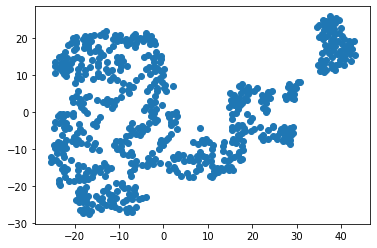

In [51]:
from matplotlib import pyplot as plt

# The first column of transformed features
pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
pca_df['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(pca_df['x'], pca_df['y'])
plt.show()

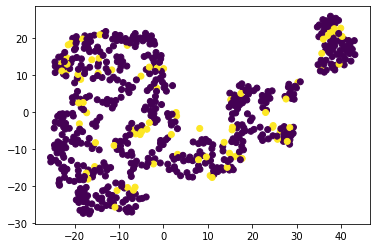

In [52]:
# Visualize the clusters with color
plt.scatter(pca_df['x'], pca_df['y'], c=df['MYOPIC'])
plt.show()

c:\Users\e1317395\Anaconda3\envs\pythondata\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


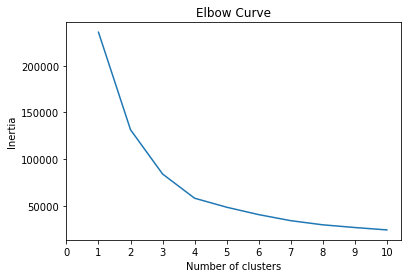

In [48]:
from sklearn.cluster import KMeans
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [53]:
"""
The elbow of the plot is at n_clusters = 4, so a 4 cluster model will be used.
"""

model = KMeans(n_clusters=4, random_state=5)
model.fit(pca_df)
predictions = model.predict(pca_df)
print(predictions)

[0 1 1 0 1 0 0 3 3 0 2 1 3 1 1 1 1 1 2 0 0 3 0 0 0 0 1 1 1 1 3 2 0 0 1 1 2
 1 3 3 3 1 2 1 0 1 2 1 3 0 3 3 3 3 1 0 1 1 3 3 0 1 0 1 0 1 1 1 1 3 0 2 2 0
 1 1 1 0 0 3 3 3 3 1 3 1 0 2 3 1 1 3 1 0 3 2 1 1 1 1 2 0 0 0 0 0 3 1 1 3 2
 3 2 1 3 3 1 3 1 3 3 3 1 1 2 0 0 3 3 3 3 0 0 1 0 3 1 3 3 0 1 1 3 1 3 1 0 2
 1 0 1 3 2 1 0 3 3 1 1 1 0 3 1 1 1 2 2 0 0 3 1 0 2 3 3 1 1 3 2 1 0 2 3 1 1
 2 1 3 1 0 1 1 1 1 3 0 3 1 1 0 3 3 3 0 1 3 0 1 3 0 0 0 0 0 1 1 0 3 1 0 1 0
 0 3 3 0 2 2 0 1 2 1 3 2 1 1 3 0 3 1 2 0 3 0 3 1 1 3 2 3 1 2 3 2 3 3 3 3 1
 0 2 3 0 1 3 1 0 1 3 3 1 3 0 2 1 3 0 3 0 0 1 2 1 2 1 1 1 0 1 1 3 3 0 3 2 3
 3 3 0 0 3 1 0 2 1 1 2 3 0 2 0 3 0 3 3 0 3 1 3 2 0 0 1 0 3 0 3 0 1 0 3 1 3
 3 3 3 1 1 0 1 1 1 3 3 1 3 3 2 2 0 3 3 0 3 1 0 3 1 0 1 3 1 3 0 3 3 3 0 3 0
 0 1 1 0 2 0 3 3 3 1 2 3 0 1 1 2 3 2 1 2 3 2 1 3 3 0 1 0 1 1 0 3 1 2 2 0 1
 2 0 0 0 0 3 0 0 0 3 1 3 3 0 2 3 3 2 1 1 0 0 1 2 1 3 3 3 2 3 0 0 2 3 3 0 2
 0 3 1 0 3 2 2 2 0 2 0 2 1 3 0 2 0 1 0 3 2 1 1 0 1 0 3 0 3 3 2 1 3 3 3 2 0
 3 1 2 1 3 0 0 1 2 2 3 3 

In [54]:
pca_df["class"] = model.labels_

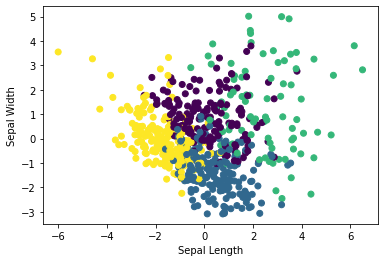

In [55]:
plt.scatter(x=pca_df["principal component 1"], y=pca_df["principal component 2"], c=pca_df['class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

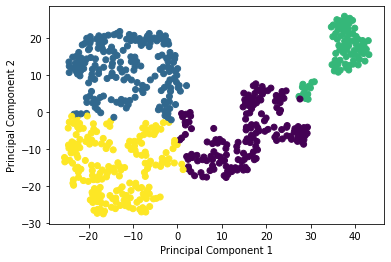

In [58]:
plt.scatter(x=pca_df["x"], y=pca_df["y"], c=pca_df['class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

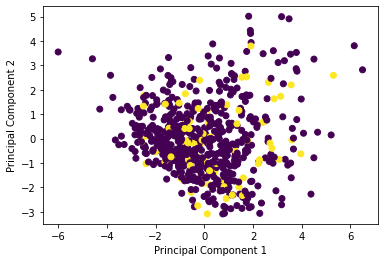

In [60]:
final_df = pca_df
final_df['myopic'] = df['MYOPIC']

plt.scatter(x=final_df["principal component 1"], y=final_df["principal component 2"], c=final_df['myopic'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
"""
This model doesn't accurately predict myopia.
"""